In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

from sdlbfgs import *
from curveball import *
from helpers_opt_parameters import *

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [3]:
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [5]:
print(valloader)
len(valloader)

157

64 images in each batch and each image has a dimension of 28 x 28 pixels


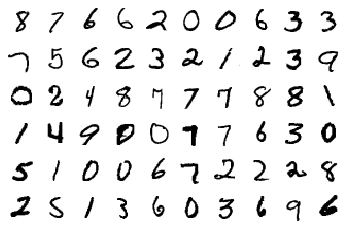

In [5]:
# A subset of a batch is plotted to show a sample of the dataset. 
dataiter = iter(trainloader)
images, labels = dataiter.next()
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Neural Network 

## CurveBall

### Fully connected network

In [6]:
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# The model is built
model=fully_connected_NN(sizes)
# Loss of the model is defined.
criterion = nn.NLLLoss()

method = "CurveBall"
# Negative learning rate and momentum allow the method to automatically handle such parameters
optimizer = CurveBall(model.parameters(),lr=-1,momentum=-1)

epochs = 30
train_losses_fcnn, test_losses_fcnn, train_accuracy_fcnn, test_accuracy_fcnn, training_time_fcnn = optimize(optimizer, epochs, trainloader, valloader, model, criterion , method )


Epoch 0


/Users/distiller/project/conda/conda-bld/pytorch_1587428061935/work/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


Training loss: 0.34614073162251063
Number Of Images Tested = 10000
Model Accuracy = 0.9015
Number Of Images Tested = 60000
Model Accuracy = 0.8978833333333334
Test loss: 0.2971075788899592 

Epoch 1
Training loss: 0.08915220365933041
Number Of Images Tested = 10000
Model Accuracy = 0.9094
Number Of Images Tested = 60000
Model Accuracy = 0.9045166666666666
Test loss: 0.27207898566867134 

Epoch 2
Training loss: 0.05424301316147483
Number Of Images Tested = 10000
Model Accuracy = 0.965
Number Of Images Tested = 60000
Model Accuracy = 0.9680666666666666
Test loss: 0.11515328552645103 

Epoch 3
Training loss: 0.03685896464937261
Number Of Images Tested = 10000
Model Accuracy = 0.9664
Number Of Images Tested = 60000
Model Accuracy = 0.97305
Test loss: 0.10326659474759155 

Epoch 4
Training loss: 0.028607804914499557
Number Of Images Tested = 10000
Model Accuracy = 0.9687
Number Of Images Tested = 60000
Model Accuracy = 0.9766333333333334
Test loss: 0.10601752776961038 

Epoch 5
Training los

In [8]:
np.savetxt('curveball_fcNN_trainloss.txt', train_losses_fcnn)
np.savetxt('curveball_fcNN_testloss.txt', test_losses_fcnn)
np.savetxt('curveball_fcNN_trainacc.txt', train_accuracy_fcnn)
np.savetxt('curveball_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('curveball_fcNN_times.txt',[training_time_fcnn])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


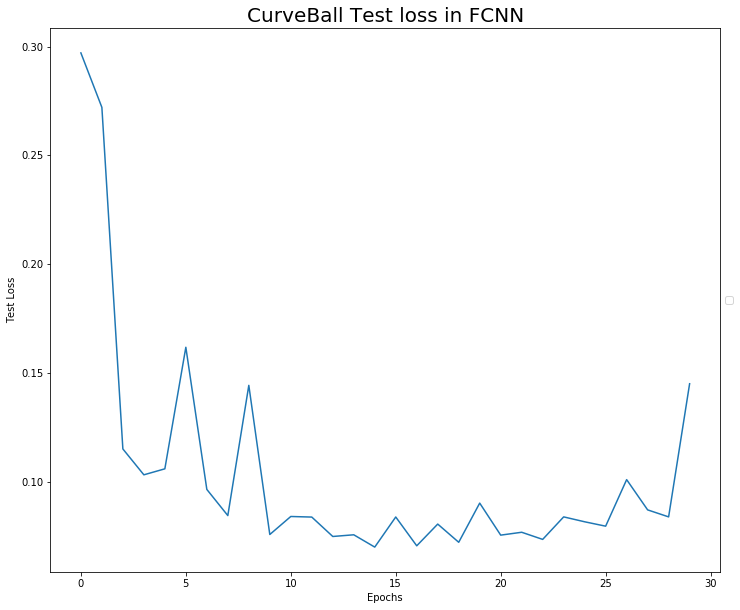

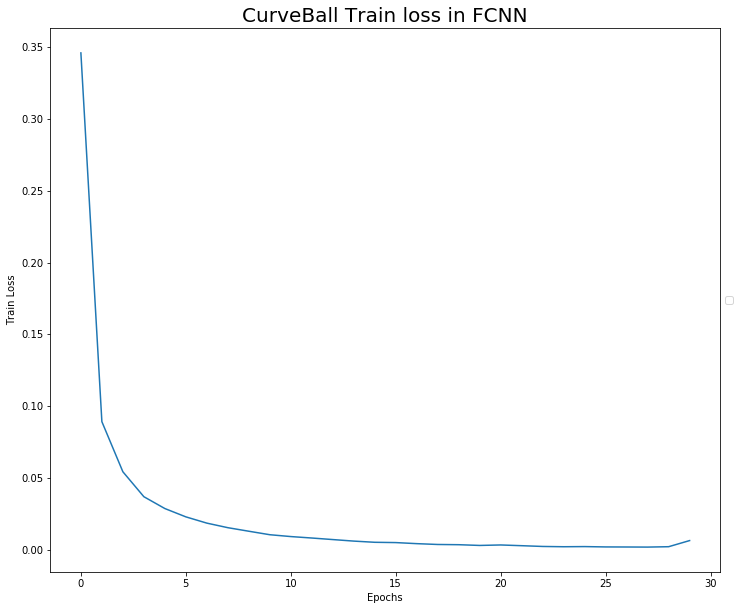

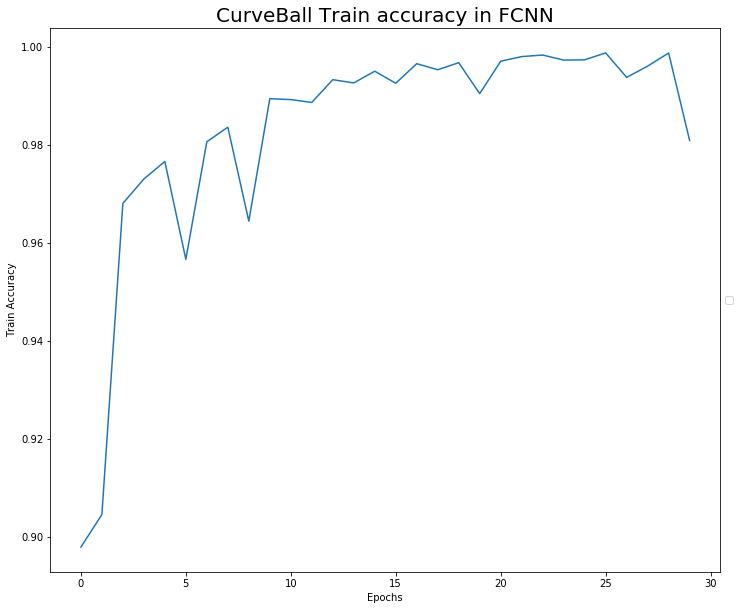

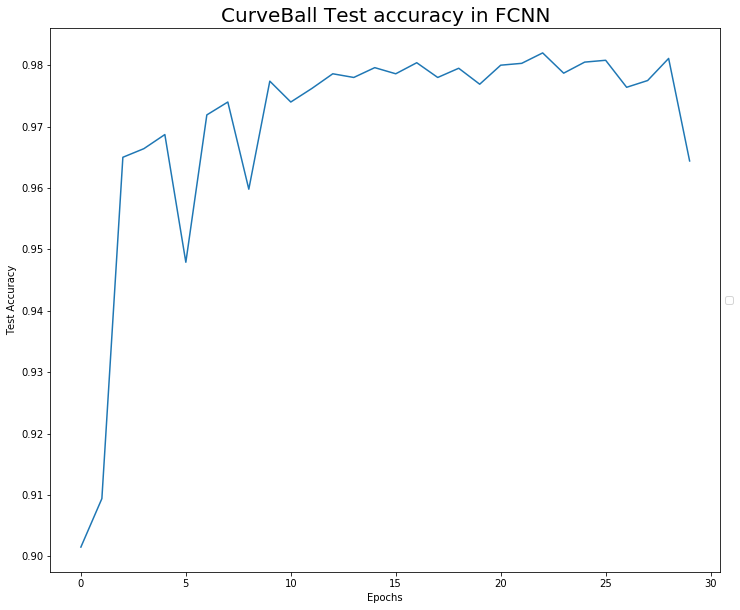

In [9]:
plt.figure(1, figsize = (12,10))
plt.plot(test_losses_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('CurveBall Test loss in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_test_loss_fcnn.jpg")

plt.figure(2, figsize = (12,10))
plt.plot(train_losses_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('CurveBall Train loss in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_train_loss_fcnn.jpg")

plt.figure(3, figsize = (12,10))
plt.plot(train_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('CurveBall Train accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_train_accuracy_fcnn.jpg")

plt.figure(4, figsize = (12,10))
plt.plot(test_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('CurveBall Test accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_test_accuracy_fcnn.jpg")


No handles with labels found to put in legend.
No handles with labels found to put in legend.


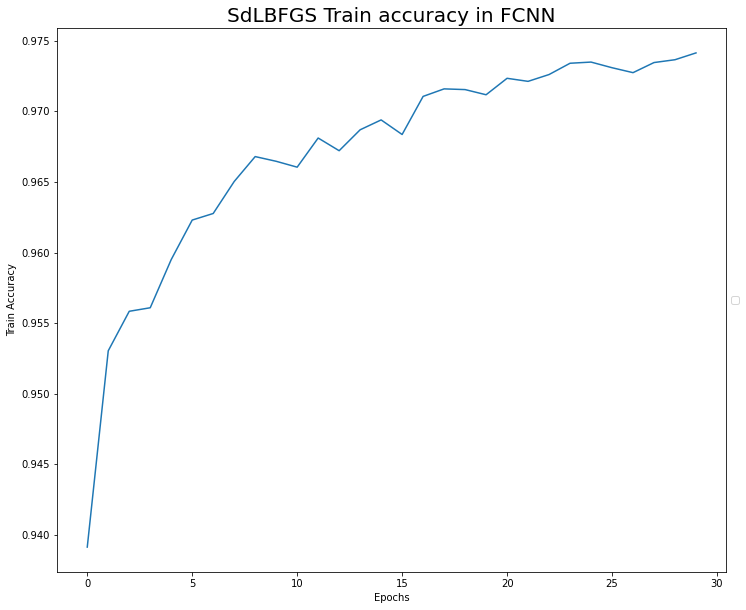

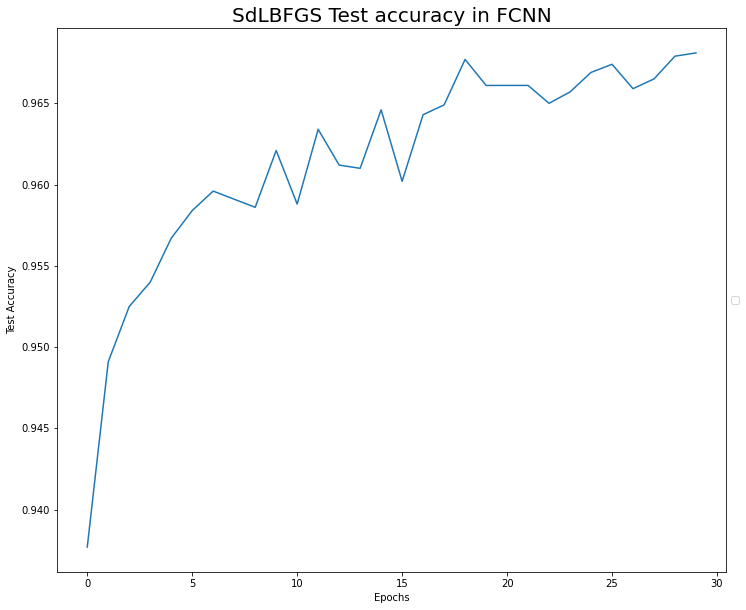

In [20]:

plt.figure(3, figsize = (12,10))
plt.plot(train_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('CurveBall Train accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_train_accuracy_fcnn.jpg")

plt.figure(4, figsize = (12,10))
plt.plot(test_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('CurveBall Test accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_test_accuracy_fcnn.jpg")

### CNN

In [11]:
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# Model building
# The size of the images is computed.
images,_=dataiter.next()
image_size=images[0].shape[1]
# Using nn.CrossEntropyLoss allows to avoid specifying LogSoftmax as final layer.
criterion = nn.CrossEntropyLoss()
modelB=ConvNet(image_size)


method = "CurveBall"
optimizer = CurveBall(modelB.parameters(), lr=-1,momentum=-1)

epochs = 30

train_losses_cnn, test_losses_cnn, train_accuracy_cnn, test_accuracy_cnn, training_time_cnn = optimize_CNN(optimizer, epochs, trainloader, valloader, modelB, criterion , method )



Epoch 0
Training loss: 0.18232632674741497
Number Of Images Tested = 10000
Model Accuracy = 0.9792
Number Of Images Tested = 60000
Model Accuracy = 0.9773
Test loss: 0.06876943850071188 

Epoch 1
Training loss: 0.029909978060722986
Number Of Images Tested = 10000
Model Accuracy = 0.9846
Number Of Images Tested = 60000
Model Accuracy = 0.9854333333333334
Test loss: 0.04731945584640856 

Epoch 2
Training loss: 0.01787600640146963
Number Of Images Tested = 10000
Model Accuracy = 0.9889
Number Of Images Tested = 60000
Model Accuracy = 0.9894833333333334
Test loss: 0.034118086353217246 

Epoch 3
Training loss: 0.01317459100149701
Number Of Images Tested = 10000
Model Accuracy = 0.9879
Number Of Images Tested = 60000
Model Accuracy = 0.9902166666666666
Test loss: 0.03645462346942443 

Epoch 4
Training loss: 0.009584014573797726
Number Of Images Tested = 10000
Model Accuracy = 0.9819
Number Of Images Tested = 60000
Model Accuracy = 0.98325
Test loss: 0.05393687504711472 

Epoch 5
Training los

KeyboardInterrupt: 

In [0]:
np.savetxt('curveball_CNN_trainloss.txt', train_losses_cnn)
np.savetxt('curveball_CNN_testloss.txt', test_losses_cnn)
np.savetxt('curveball_CNN_trainacc.txt', train_accuracy_cnn)
np.savetxt('curveball_CNN_testacc.txt', test_accuracy_cnn)


In [0]:
training_time_cnn


In [0]:
plt.figure(1, figsize = (12,10))
plt.plot(test_losses_cnn)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('CurveBall Test loss in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_test_loss_cnn.jpg")

plt.figure(2, figsize = (12,10))
plt.plot(train_losses_cnn)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('CurveBall Train loss in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_train_loss_cnn.jpg")

plt.figure(3, figsize = (12,10))
plt.plot(train_accuracy_cnn)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('CurveBall Train accuracy in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_train_accuracy_cnn.jpg")

plt.figure(4, figsize = (12,10))
plt.plot(test_accuracy_cnn)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('CurveBall Test accuracy in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("CurveBall_test_accuracy_cnn.jpg")